Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# Make Explanatory Visualizations

**Objectives**

- What are continuous and discrete variables? Using pandas built-in plotting functionality.
- Learn about various types of `pandas` plots using `matplotlib`
- use `matplotlib` to visualize distributions and relationships with continuous and discrete variables
- imitate a real-world example

In [1]:
## Imports.
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Specify the 'plot style' we want to use with pandas and matplotlib
plt.style.use('fast') 
# "fast" is actually the default style, so you don't necessarily have to set it.

In [2]:
# List of other available plot styles you can use instead of "fast".
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

## Part 1. The Pandas built-in visualization tool
This is useful only for simple, quick-and-dirty plots. [Read the full documentation](https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html). For anything more complex you'll want to use a more robust visualization package such as `matplotlib`, `seaborn`, or `plotly`.  

"Under the hood, pandas plots graphs with the matplotlib library. This is usually pretty convenient since it allows you to just .plot your graphs, but since matplotlib is kind of a train wreck pandas inherits that confusion." [J. Sonoma](http://jonathansoma.com/lede/algorithms-2017/classes/fuzziness-matplotlib/understand-df-plot-in-pandas/)


**Continuous vs. Discrete variables**

In [3]:
# Read in the titanic dataset
# url = 'https://raw.githubusercontent.com/austinlasseter/pandas_visualization/master/data/titanic.csv'
url = '/Users/austinlasseter/atelier/lambda/dspt4/scraps/pandas_visualization/data/titanic.csv'
df = pd.read_csv(url)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,Southampton
1,1,1,female,38.0,71.2833,Cherbourg
2,1,3,female,26.0,7.9250,Southampton
3,1,1,female,35.0,53.1000,Southampton
4,0,3,male,35.0,8.0500,Southampton


In [4]:
# cabin class is a discrete variable
# it can be displayed using either number or string values.
df['cabin_class'] = df['Pclass'].map({1:'first', 2: 'second', 3:'third'})
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,cabin_class
0,0,3,male,22.0,7.2500,Southampton,third
1,1,1,female,38.0,71.2833,Cherbourg,first
2,1,3,female,26.0,7.9250,Southampton,third
3,1,1,female,35.0,53.1000,Southampton,first
4,0,3,male,35.0,8.0500,Southampton,third


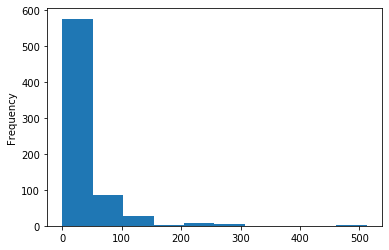

In [5]:
# Fare is a continuous variable, so we can display it with a histogram.
df['Fare'].plot(kind='hist');

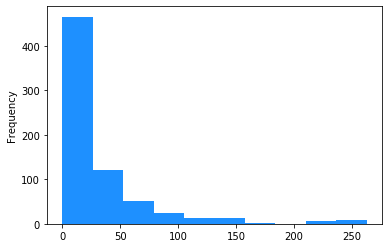

In [6]:
# Remove two extreme outliers
df=df[df['Fare']<500]
df['Fare'].plot(kind='hist',color='dodgerblue');

In [7]:
# A continuous variable can be converted to a discrete var using binning.
farebins=[0,8,15,33,512]
farelabels=['low', 'medium', 'high','vhigh']
df['fare_groups']= pd.cut(df['Fare'], bins=farebins, labels=farelabels)
myresults = df['fare_groups'].value_counts().sort_index()
myresults

low       154
medium    189
high      185
vhigh     174
Name: fare_groups, dtype: int64

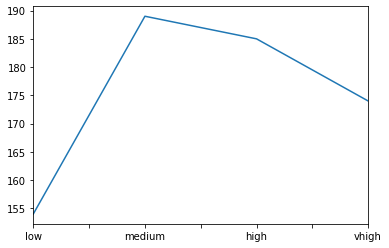

In [8]:
# sometimes it's important to specify the range of your y-axis to get more accurate results. 'lim'='limits'
myresults.plot();
# myresults.plot(ylim=(0,200));

**Display a single continuous variable**

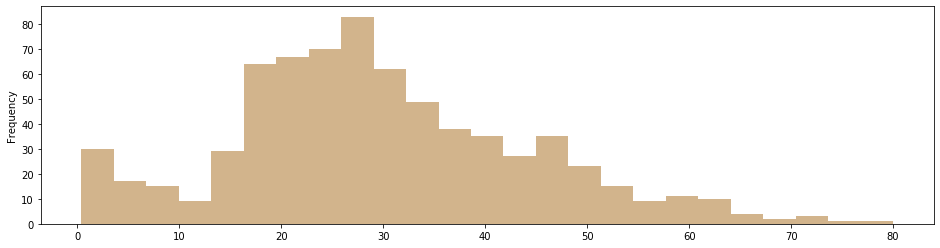

In [9]:
# Histogram
df['Age'].plot(kind='hist', bins=25, figsize=(16,4), color='tan');

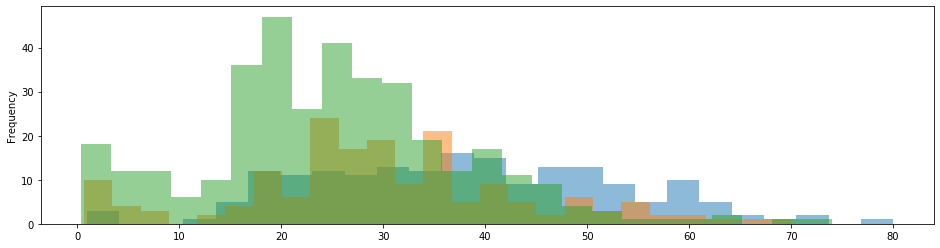

In [10]:
# Stacked Histogram of continuous variable, broken out by discrete variable
df[df['Pclass']==1]['Age'].plot(kind='hist', bins=25, figsize=(16,4), alpha=0.5)
df[df['Pclass']==2]['Age'].plot(kind='hist', bins=25, figsize=(16,4), alpha=0.5)
df[df['Pclass']==3]['Age'].plot(kind='hist', bins=25, figsize=(16,4), alpha=0.5);

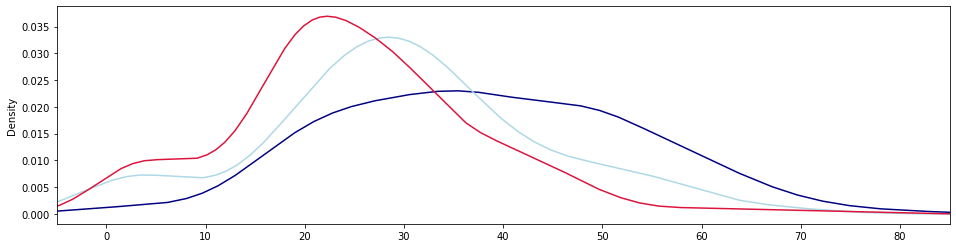

In [11]:
# But this is actually easier to read using a Kernel Density Estimate (KDE). Note the use of 'xlim'.
df[df['Pclass']==1]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(16,4), color='navy')
df[df['Pclass']==2]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(16,4), color='lightblue')
df[df['Pclass']==3]['Age'].plot(kind='density', xlim=(-5, 85), figsize=(16,4), color='crimson');

**Display a single discrete variable**

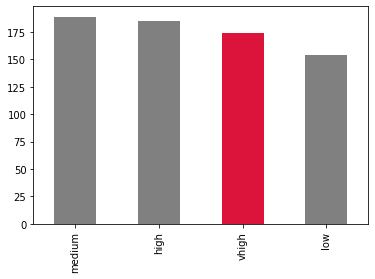

In [12]:
# Bar chart. Use colors to make a particular value 'pop'!
df['fare_groups'].value_counts().plot(kind='bar', color=['gray', 'gray', 'crimson', 'gray']);

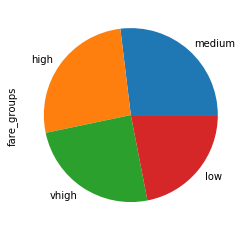

In [13]:
# Pie chart
df['fare_groups'].value_counts().plot(kind='pie', figsize=(4,4));

**Compare two discrete variables**

In [14]:
# Compare two discrete variables using crosstab
cab_death = pd.crosstab(df['cabin_class'],df['Survived'])
cab_death

Survived,0,1
cabin_class,,
first,64,117
second,90,83
third,270,85


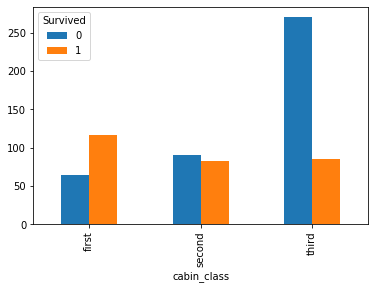

In [15]:
# Make that into a bar chart.
cab_death.plot(kind='bar');

In [16]:
# Crosstab with column percents.
cab_death1 = pd.crosstab(df['cabin_class'],df['Survived'], normalize='columns')
cab_death1

Survived,0,1
cabin_class,,
first,0.150943,0.410526
second,0.212264,0.291228
third,0.636792,0.298246


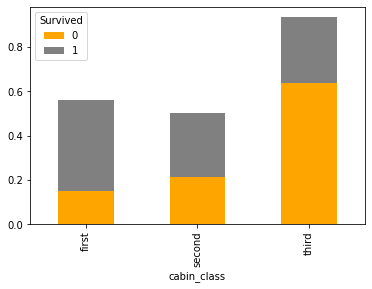

In [17]:
# make a stacked bar chart, for easy comparison of two discrete variables.
cab_death1.plot(kind='bar', stacked=True, color=['orange', 'gray']);

In [18]:
# Crosstab with column percents.
cab_death2 = pd.crosstab(df['cabin_class'],df['Survived'], normalize='index')
cab_death2

Survived,0,1
cabin_class,,
first,0.353591,0.646409
second,0.520231,0.479769
third,0.760563,0.239437


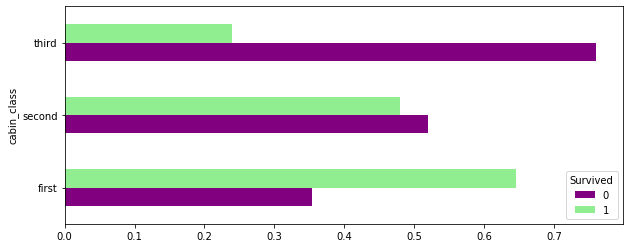

In [19]:
# A paired barchart for comparison of two discrete variables. Note the use of 'barh'.
cab_death2.plot(kind='barh', color=['purple', 'lightgreen'], figsize=(10,4));

**Compare a discrete and continuous variable**

In [20]:
# Let's look at a single continuous variable
df['Age'].mean()

29.618011283497882

In [21]:
# Now explore that continuous variable broken out by a categorical (i.e., discrete) variable.
cab_age = df.groupby('cabin_class')['Age'].mean()
cab_age

cabin_class
first     38.151492
second    29.877630
third     25.140620
Name: Age, dtype: float64

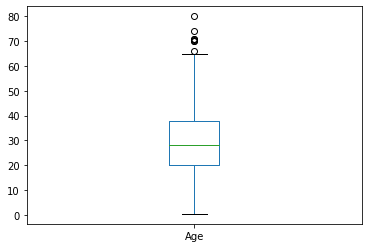

In [22]:
# To visualize a single continuous variable, you can just use `.plot` with `kind=box`
df['Age'].plot(kind='box');

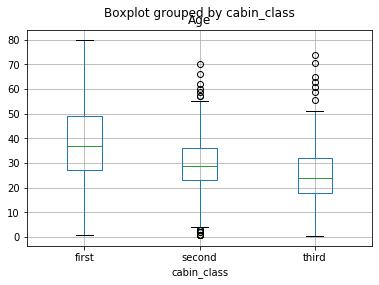

In [23]:
# But to break out a continuous variable by a categorical variable, use `.boxplot`
df.boxplot(column='Age', by='cabin_class');

**Compare two or three continuous variables**

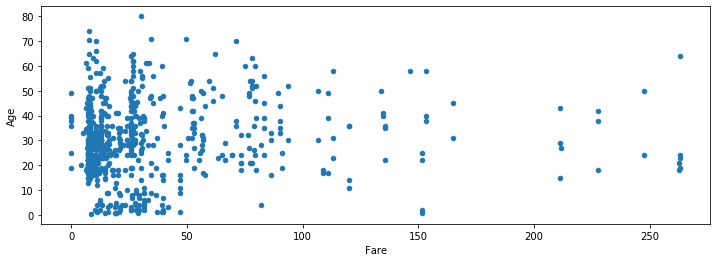

In [24]:
# Two continuous variables: age by fare
df.plot(kind = 'scatter', x='Fare', y='Age', figsize=(12,4));

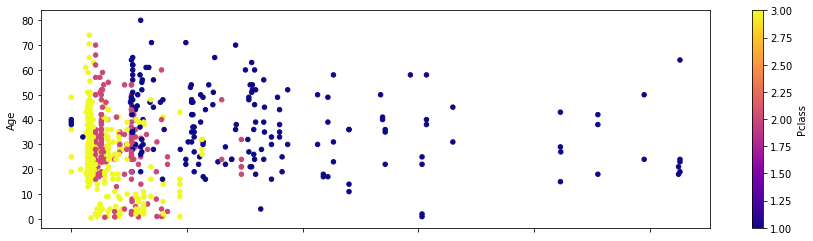

In [25]:
# Three variables: age, fare, and cabin class (color can be either continuous or discrete here).
df.plot(kind = 'scatter', x='Fare', y='Age', c='Pclass', colormap='plasma', figsize=(15,4));

**Use a line plot to examine two continuous variables (often time)**

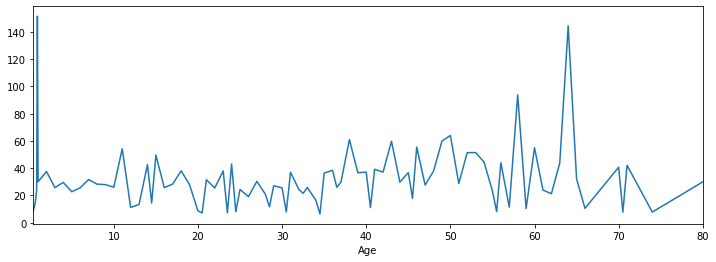

In [26]:
# line chart: age by fare
df.groupby('Age')['Fare'].mean().plot(figsize=(12,4));

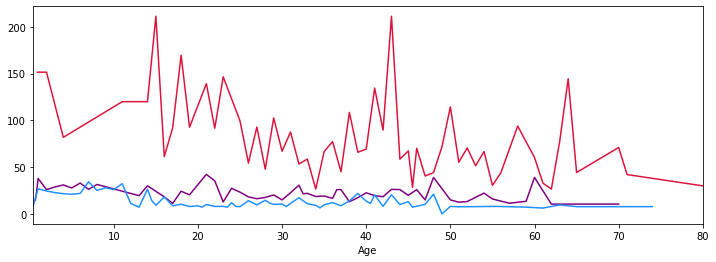

In [27]:
# Line chart: age by fare and cabin class
mycolors=['crimson', 'purple', 'dodgerblue']
# Rather than specifying 3 plots (as we did above, with the histogram) you can just loop through the values.
for x in [1,2,3]:
    df[df['Pclass']==x].groupby('Age')['Fare'].mean().plot(figsize=(12,4), color=mycolors[x-1])

**Compare multiple continuous variables**

In [28]:
# Correlation Matrix
corr_matrix = df.corr()
corr_matrix

,Survived,Pclass,Age,Fare
Survived,1.000000,-0.351579,-0.084756,0.272376
Pclass,-0.351579,1.000000,-0.365259,-0.616062
Age,-0.084756,-0.365259,1.000000,0.096573
Fare,0.272376,-0.616062,0.096573,1.000000


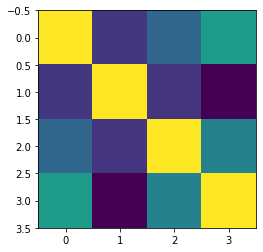

In [29]:
# Display the correlation matrix as a heatmap
plt.imshow(corr_matrix);

**But this actually is easier and better looking if you use `seaborn` code.**

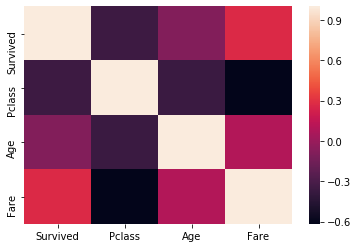

In [30]:
# More about seaborn further down.
sns.heatmap(corr_matrix);

## Intro to `matplotlib`

## Imitate a real-world example

Today we will reproduce this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)



In [31]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

Using this data: https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

Links
- [Strong Titles Are The Biggest Bang for Your Buck](http://stephanieevergreen.com/strong-titles/)
- [Remove to improve (the data-ink ratio)](https://www.darkhorseanalytics.com/blog/data-looks-better-naked)
- [How to Generate FiveThirtyEight Graphs in Python](https://www.dataquest.io/blog/making-538-plots/)

## Make prototypes

This  helps us understand the problem

In [32]:
# what styles are available in matplotlib?
plt.style.available[:5]

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid']

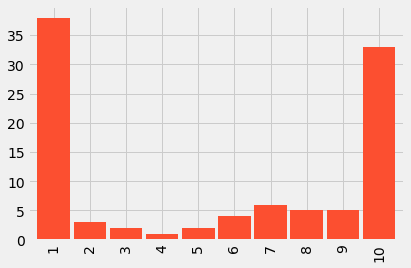

In [33]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd


plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], 
                 index=range(1,11))

fake.plot.bar(color='C1', width=0.9);

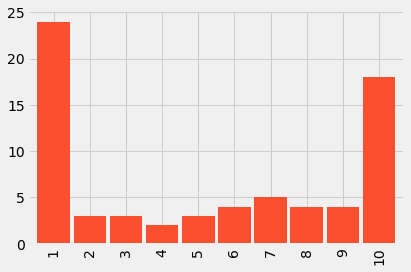

In [34]:
fake2 = pd.Series(
    [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
     2, 2, 2, 
     3, 3, 3,
     4, 4,
     5, 5, 5,
     6, 6, 6, 6,
     7, 7, 7, 7, 7,
     8, 8, 8, 8,
     9, 9, 9, 9, 
     10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10, 10])

fake2.value_counts().sort_index().plot.bar(color='C1', width=0.9);

## Annotate with text

In [35]:
list(range(1,11,1))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [36]:
fake

1     38
2      3
3      2
4      1
5      2
6      4
7      6
8      5
9      5
10    33
dtype: int64

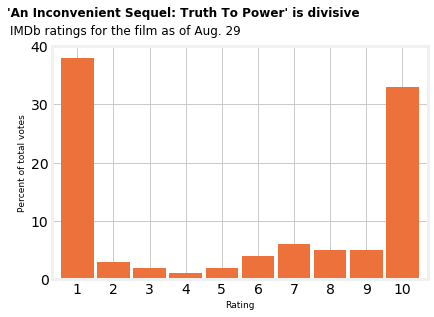

In [37]:
fig, ax = plt.subplots()
fig.patch.set(facecolor="white")
# fig.suptitle('Test Title')

# Set the bars
# ax.bar(x=[1,2,3,4,5,6,7,8,9,10], height=fake, width=0.9, color="#ED713A")
fake.plot.bar(width=0.9, color="#ED713A")

ax.set(facecolor="white")

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.35, 
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42);

# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

# Fix the x an y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));

In [38]:
display(example)

## Reproduce with real data

Using this dataset relies on us making two discoveries:

1) The dataset shows logs of the data at different timestamps and these timestamps are cumulative, meaning that it has all of the ratings as earlier timestamps, but with the new ones added on top. 2) The dataset logs ratings breakdowns for a bunch of different demographic groups per timestamp.

Once we realize these two things, we realize that we only really need 1 line of this dataset to make our graphic, it's the last line that holds the ratings for all IMDb users for the very last time stamp.

In [39]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')

URLError: <urlopen error [Errno 8] nodename nor servname provided, or not known>

In [ ]:
df.head()

In [ ]:
# Convert timestamps strings to actual datetime objects
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [ ]:
# Use the timestamp as the unique index identifier 
# so that we can select rows by timestamp
df.set_index('timestamp', inplace=True)

In [ ]:
# grab only the rows corresponding to the last day
lastday = df['2017-08-29']

In [ ]:
# get the demographic breakdowns for all IMDb users on the last day
lastday_filtered = lastday[lastday['category'] == 'IMDb users']
lastday_filtered.tail()

In [ ]:
# just grab the very last line (latest timestamp) of IMDb user ratings
# this should be the most up to date data from the dataset
final = lastday_filtered.tail(1)
final.T

In [ ]:
# Grab only the percentage columns since we don't care about the raw 
# counts in making our graph
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']
final[pct_columns].T

In [ ]:
# Reset the index so that it's numeric again
# and rename the percent column for easy access in our plotting
plot_data = final[pct_columns].T
plot_data.index = range(1,11)
plot_data.columns = ['percent']
plot_data

In [ ]:
fig, ax = plt.subplots()

# Figure background color
fig.patch.set(facecolor="white")

# Set the bars
ax.bar(x=range(1,11), height=plot_data['percent'], width=0.9, color="#ED713A")

# Axes background color
ax.set(facecolor="white")

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.35, 
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42)

# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

# Fix the x an y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_xticks(range(1,11))
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));